In [32]:
import plotly
import plotly.plotly        as     py
from plotly import graph_objs as go
import pandas               as     pd
import seaborn              as     sns
import matplotlib.pyplot    as     plt

plotly.tools.set_credentials_file(username='zkullz20023012', api_key='BURcTEiflJO8BLCRe4N2')
sns.set(color_codes=True)

# The Olympic Games

In [9]:
games = pd.read_pickle('../dat/games.pkl')
print(games.shape)
games.head()

(271116, 11)


,Year,Season,Games,Host Country,NOC,Region,Athlete,Gender,Sport,Event,Medal
0,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Tennis,Tennis Men's Singles,NaN
1,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Tennis,Tennis Men's Doubles,Bronze
2,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,Athletics Men's 800 metres,Gold
3,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,"Athletics Men's 1,500 metres",Gold
4,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,Athletics Men's Marathon,NaN


In [10]:
medals = pd.read_pickle('../dat/medals.pkl')
print(medals.shape)
medals.head()

(3837, 15)


,Year,Summer,Games,Host,NOC,Region,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes,Athletes per Event
0,1896,1,1896 Summer,0,AUS,Australia,1,0,2,5,3,2,0,1,0.200
1,1896,1,1896 Summer,0,AUT,Austria,3,0,3,8,5,2,1,2,0.375
2,1896,1,1896 Summer,0,DEN,Denmark,3,0,5,12,6,1,2,3,0.250
3,1896,1,1896 Summer,0,FRA,France,12,0,6,18,11,5,4,2,0.667
4,1896,1,1896 Summer,0,GBR,UK,10,0,7,19,9,3,3,3,0.526


In [11]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 15 columns):
Year                  3837 non-null int64
Summer                3837 non-null int64
Games                 3837 non-null object
Host                  3837 non-null int64
NOC                   3837 non-null object
Region                3837 non-null object
Athletes              3837 non-null int64
Females               3837 non-null int64
Sports                3837 non-null int64
Events                3837 non-null int64
Medals                3837 non-null int64
Golds                 3837 non-null int64
Silvers               3837 non-null int64
Bronzes               3837 non-null int64
Athletes per Event    3837 non-null float64
dtypes: float64(1), int64(11), object(3)
memory usage: 449.8+ KB


In [12]:
medals.describe()

,Year,Summer,Host,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes,Athletes per Event
count,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000,3837.000000
mean,1981.898879,0.732343,0.013031,48.819390,12.714881,6.980975,29.816523,4.927026,1.614543,1.606203,1.706281,1.405321
std,28.381436,0.442795,0.113422,81.959612,30.059266,6.380562,41.565980,14.017079,5.348270,4.610761,4.492201,0.901652
min,1896.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.143000
25%,1964.000000,0.000000,0.000000,5.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1988.000000,1.000000,0.000000,15.000000,2.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,1.136000
75%,2004.000000,1.000000,0.000000,54.000000,10.000000,10.000000,36.000000,4.000000,1.000000,1.000000,1.000000,1.713000
max,2016.000000,1.000000,1.000000,735.000000,291.000000,34.000000,270.000000,230.000000,82.000000,79.000000,75.000000,17.000000


In [13]:
hover_text = []
color_range = []
for index, row in medals.iterrows():
    hover_text.append(('Games: {games}<br>'+
                       'Host: {host}<br>'+
                       'NOC: {noc}<br>'+
                       'Region: {region}<br>'+
                       'Athletes: {athletes}<br>'+
                       'Females: {females}<br>'+
                       'Sports: {sports}<br>'+
                       'Events: {events}<br>'+
                       'Athletes per Event: {ape}<br>'+
                       'Medals: {medals}<br>'+
                       'Golds: {golds}<br>'+
                       'Silvers: {silvers}<br>'+
                       'Bronzes: {bronzes}').format(games    = row['Games'],
                                                    host     = row['Host'],
                                                    noc      = row['NOC'],
                                                    region   = row['Region'],
                                                    athletes = row['Athletes'],
                                                    females  = row['Females'],
                                                    sports   = row['Sports'],
                                                    events   = row['Events'],
                                                    ape      = row['Athletes per Event'],
                                                    medals   = row['Medals'],
                                                    golds    = row['Golds'],
                                                    silvers  = row['Silvers'],
                                                    bronzes  = row['Bronzes']))
    color_range.append(max(row['Medals'],100))

trace0 = go.Scatter(
    x      = medals['Athletes'],
    y      = medals['Events'],
    text   = hover_text,
    mode   = 'markers',
    marker = dict(
#        size          = medals['Athletes'],
        color         = color_range,
        showscale     = True,
        reversescale  = True,
        colorscale    = 'RdBu',
        colorbar      = dict(
                title = 'Total<br>Medals'
            )
    )
)

data      = [trace0]
layout    = go.Layout(
    title = 'Historic Medal Table of the Olympic Games',
    xaxis = dict(
        title         = 'Total Number of Athletes by Nation',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    yaxis = dict(
        title         = 'Total Number of Events by Nation',
        gridcolor     = 'rgb(255, 255, 255)',
        zerolinewidth = 1,
        ticklen       = 5,
        gridwidth     = 2,
    ),
    paper_bgcolor = 'rgb(243, 243, 243)',
    plot_bgcolor  = 'rgb(243, 243, 243)',
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'historic-olympic-medals')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [14]:
medals['Games'].unique()

array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

In [15]:
summer = medals[medals['Summer'] == 1].groupby('Games').sum()
summer = summer.drop(['Year','Summer','Host'], axis=1)
summer = summer.reset_index()
summer = summer.merge(games[['Games','Season','Year']].drop_duplicates())

In [16]:
winter = medals[medals['Summer'] == 0].groupby('Games').sum()
winter = winter.drop(['Year','Summer','Host'], axis=1)
winter = winter.reset_index()
winter = winter.merge(games[['Games','Season','Year']].drop_duplicates())

In [17]:
summer_winter = pd.concat([summer,winter])
summer_winter = summer_winter.reset_index().drop('index', axis=1)
summer_winter

,Games,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes,Athletes per Event,Season,Year
0,1896 Summer,176,0,52,169,120,44,41,35,8.512,Summer,1896
1,1900 Summer,1220,23,129,401,291,101,98,92,43.742,Summer,1900
2,1904 Summer,650,6,56,187,279,97,93,89,23.842,Summer,1904
3,1906 Summer,841,6,120,531,224,74,77,73,26.614,Summer,1906
4,1908 Summer,2024,44,171,677,320,109,106,105,45.813,Summer,1908
5,1912 Summer,2409,53,217,932,316,108,104,104,57.089,Summer,1912
6,1920 Summer,2675,78,273,1212,446,155,152,139,62.273,Summer,1920
7,1924 Summer,3256,156,384,1665,391,129,131,131,81.742,Summer,1924
8,1928 Summer,3246,312,362,1644,356,119,118,119,96.365,Summer,1928
9,1932 Summer,1922,201,238,992,370,125,125,120,70.493,Summer,1932


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

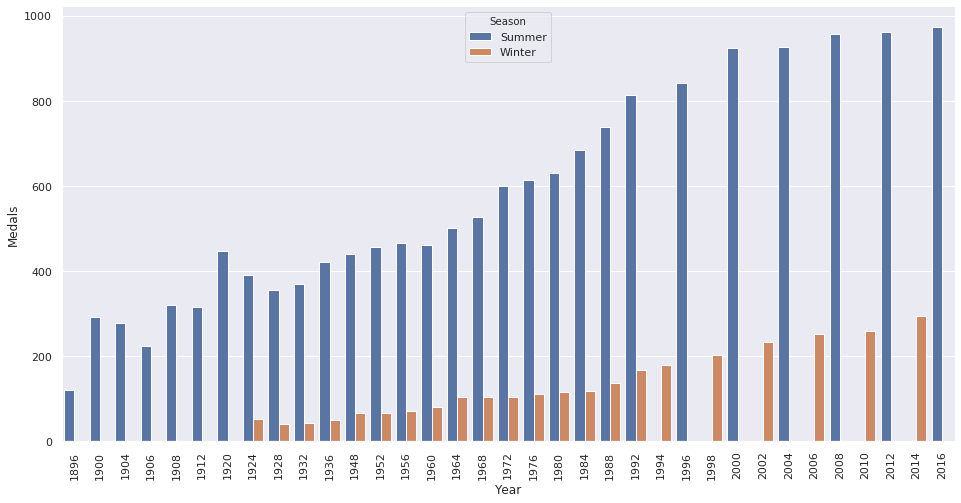

In [18]:
plt.figure("Summer and Winter Games", figsize=(16,8))
sns.barplot(x='Year', y='Medals', hue='Season', data=summer_winter)
plt.xticks(rotation=90)

# The Olympic Athletes

In [19]:
games['Summer']     = games['Season'] == 'Summer'
games['Female']     = games['Gender'] == 'F'
games['Gold']       = games['Medal']  == 'Gold'
games['Silver']     = games['Medal']  == 'Silver'
games['Bronze']     = games['Medal']  == 'Bronze'
games['Home Field'] = games['NOC']    == games['Host Country']
print(games.shape)
games.head()

(271116, 17)


,Year,Season,Games,Host Country,NOC,Region,Athlete,Gender,Sport,Event,Medal,Summer,Female,Gold,Silver,Bronze,Home Field
0,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Tennis,Tennis Men's Singles,NaN,True,False,False,False,False,False
1,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Tennis,Tennis Men's Doubles,Bronze,True,False,False,False,True,False
2,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,Athletics Men's 800 metres,Gold,True,False,True,False,False,False
3,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,"Athletics Men's 1,500 metres",Gold,True,False,True,False,False,False
4,1896,Summer,1896 Summer,GRE,AUS,Australia,"Edwin Harold ""Teddy"" Flack",M,Athletics,Athletics Men's Marathon,NaN,True,False,False,False,False,False


In [20]:
# Total number of unique athletes
unique_athletes = pd.DataFrame(
    games.groupby(['Athlete','NOC','Region'])['Medal'].count())['Medal'].value_counts().sum()
print(unique_athletes)

# Distribution of number of medals won by an individual athlete
medal_distribution            = pd.DataFrame(pd.DataFrame(
    games.groupby(['Athlete','NOC','Region'])['Medal'].count())['Medal'].value_counts())
medal_distribution.index.name = 'All-Time Olympic Medals Won'
medal_distribution            = medal_distribution.rename(columns={'Medal': 'Athletes'})

# Percent distribution of number of medals won by an individual athlete
medal_distribution['Percentage of Athletes'] = medal_distribution['Athletes']/unique_athletes * 100
medal_distribution['Percentage of Athletes'] = medal_distribution['Percentage of Athletes'].round(3)
medal_distribution['Percentile'] = medal_distribution['Percentage of Athletes'].cumsum()
medal_distribution

136602


,Athletes,Percentage of Athletes,Percentile
All-Time Olympic Medals Won,,,
0,108061,79.106,79.106
1,21671,15.864,94.970
2,4563,3.340,98.310
3,1333,0.976,99.286
4,522,0.382,99.668
5,198,0.145,99.813
6,111,0.081,99.894
7,51,0.037,99.931
8,37,0.027,99.958


In [21]:
# Top athletes by number of medals won
athletes           = pd.DataFrame(games.groupby(['Athlete','NOC','Region'])['Gold','Silver','Bronze'].sum())
athletes['Gold']   = athletes['Gold'].astype('int64')
athletes['Silver'] = athletes['Silver'].astype('int64')
athletes['Bronze'] = athletes['Bronze'].astype('int64')
athletes['Medals'] = athletes['Gold'] + athletes['Silver'] + athletes['Bronze']
athletes           = athletes.sort_values(by='Medals', ascending=False)
athletes           = athletes.reset_index()
athletes           = athletes.rename(columns={'Gold':    'Golds',
                                              'Silver':  'Silvers',
                                              'Bronze':  'Bronzes'})
athletes.head(20)

,Athlete,NOC,Region,Golds,Silvers,Bronzes,Medals
0,"Michael Fred Phelps, II",USA,USA,23,3,2,28
1,Larysa Semenivna Latynina (Diriy-),URS,Russia,9,5,4,18
2,Nikolay Yefimovich Andrianov,URS,Russia,7,5,3,15
3,Takashi Ono,JPN,Japan,5,4,4,13
4,Ole Einar Bjrndalen,NOR,Norway,8,4,1,13
5,Edoardo Mangiarotti,ITA,Italy,6,5,2,13
6,Borys Anfiyanovych Shakhlin,URS,Russia,7,4,2,13
7,Paavo Johannes Nurmi,FIN,Finland,9,3,0,12
8,Ryan Steven Lochte,USA,USA,6,3,3,12
9,"Dara Grace Torres (-Hoffman, -Minas)",USA,USA,4,4,4,12


# The Olympic Nations

In [22]:
# Top teams by number of medals won
teams           = medals.drop(['Year','Summer','Host','Females'], axis=1)
teams           = teams.merge(games[['Games','Host Country']].drop_duplicates(), how='left')
teams           = teams.sort_values(by='Medals', ascending=False)
teams           = teams.reset_index().drop(['index'], axis=1)
teams.head(20)

,Games,NOC,Region,Athletes,Sports,Events,Medals,Golds,Silvers,Bronzes,Athletes per Event,Host Country
0,1904 Summer,USA,USA,524,18,95,230,76,79,75,5.516,USA
1,1980 Summer,URS,Russia,489,23,202,195,80,69,46,2.421,URS
2,1984 Summer,USA,USA,522,25,217,173,82,61,30,2.406,USA
3,1908 Summer,GBR,UK,735,24,108,143,56,50,37,6.806,GBR
4,1988 Summer,URS,Russia,480,27,221,131,54,31,46,2.172,KOR
5,1980 Summer,GDR,Germany,346,17,167,126,47,37,42,2.072,URS
6,1976 Summer,URS,Russia,410,22,189,125,49,41,35,2.169,CAN
7,2016 Summer,USA,USA,555,33,245,121,46,37,38,2.265,BRA
8,1992 Summer,EUN,Russia,475,27,234,112,45,38,29,2.030,ESP
9,2008 Summer,USA,USA,588,32,258,110,36,39,35,2.279,CHN


In [23]:
nations = medals.groupby(['NOC','Region'])[['Medals','Golds','Silvers','Bronzes']].sum()
nations = nations.sort_values(by='Medals', ascending=False).reset_index()
nations.head(20)

,NOC,Region,Medals,Golds,Silvers,Bronzes
0,USA,USA,2823,1131,901,791
1,URS,Russia,1197,471,373,353
2,GER,Germany,1004,319,345,340
3,GBR,UK,919,289,320,310
4,FRA,France,879,264,286,329
5,ITA,Italy,722,256,225,241
6,SWE,Sweden,657,200,215,242
7,CHN,China,595,239,184,172
8,RUS,Russia,584,202,183,199
9,GDR,Germany,519,192,165,162


In [24]:
home         = medals[medals['Host'] == 1].groupby(['Games','NOC','Region']).sum()
home         = home.drop(['Year','Summer'], axis=1)
home         = home.reset_index()
home['Host'] = 'Host'

In [25]:
away         = medals[medals['Host'] == 0].groupby(['Games','NOC','Region']).sum()
away         = away.drop(['Year','Summer'], axis=1)
away         = away.reset_index()
away['Host'] = 'Guest'

In [26]:
home_away = pd.concat([home, away])
home_away = home_away.reset_index().drop('index', axis=1)
home_away

,Games,NOC,Region,Host,Athletes,Females,Sports,Events,Medals,Golds,Silvers,Bronzes,Athletes per Event
0,1896 Summer,GRE,Greece,Host,102,0,9,39,44,10,17,17,2.615
1,1900 Summer,FRA,France,Host,716,12,19,81,102,28,40,34,8.840
2,1904 Summer,USA,USA,Host,524,6,18,95,230,76,79,75,5.516
3,1906 Summer,GRE,Greece,Host,312,5,13,70,35,8,14,13,4.457
4,1908 Summer,GBR,UK,Host,735,39,24,108,143,56,50,37,6.806
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,2016 Summer,VIE,Vietnam,Guest,22,12,10,24,2,1,1,0,0.917
3833,2016 Summer,VIN,Saint Vincent,Guest,4,2,2,4,0,0,0,0,1.000
3834,2016 Summer,YEM,Yemen,Guest,3,1,3,3,0,0,0,0,1.000
3835,2016 Summer,ZAM,Zambia,Guest,7,2,4,7,0,0,0,0,1.000


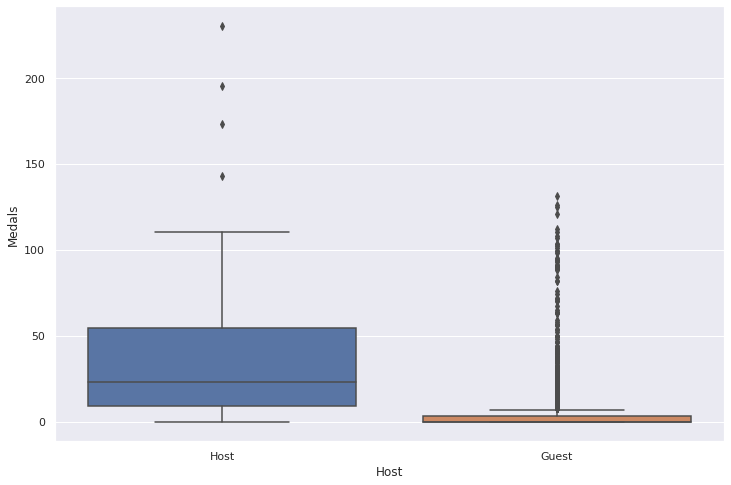

In [27]:
plt.figure("Home and Away Teams", figsize=(12,8))
sns.boxplot(x="Host", y="Medals", data=home_away)

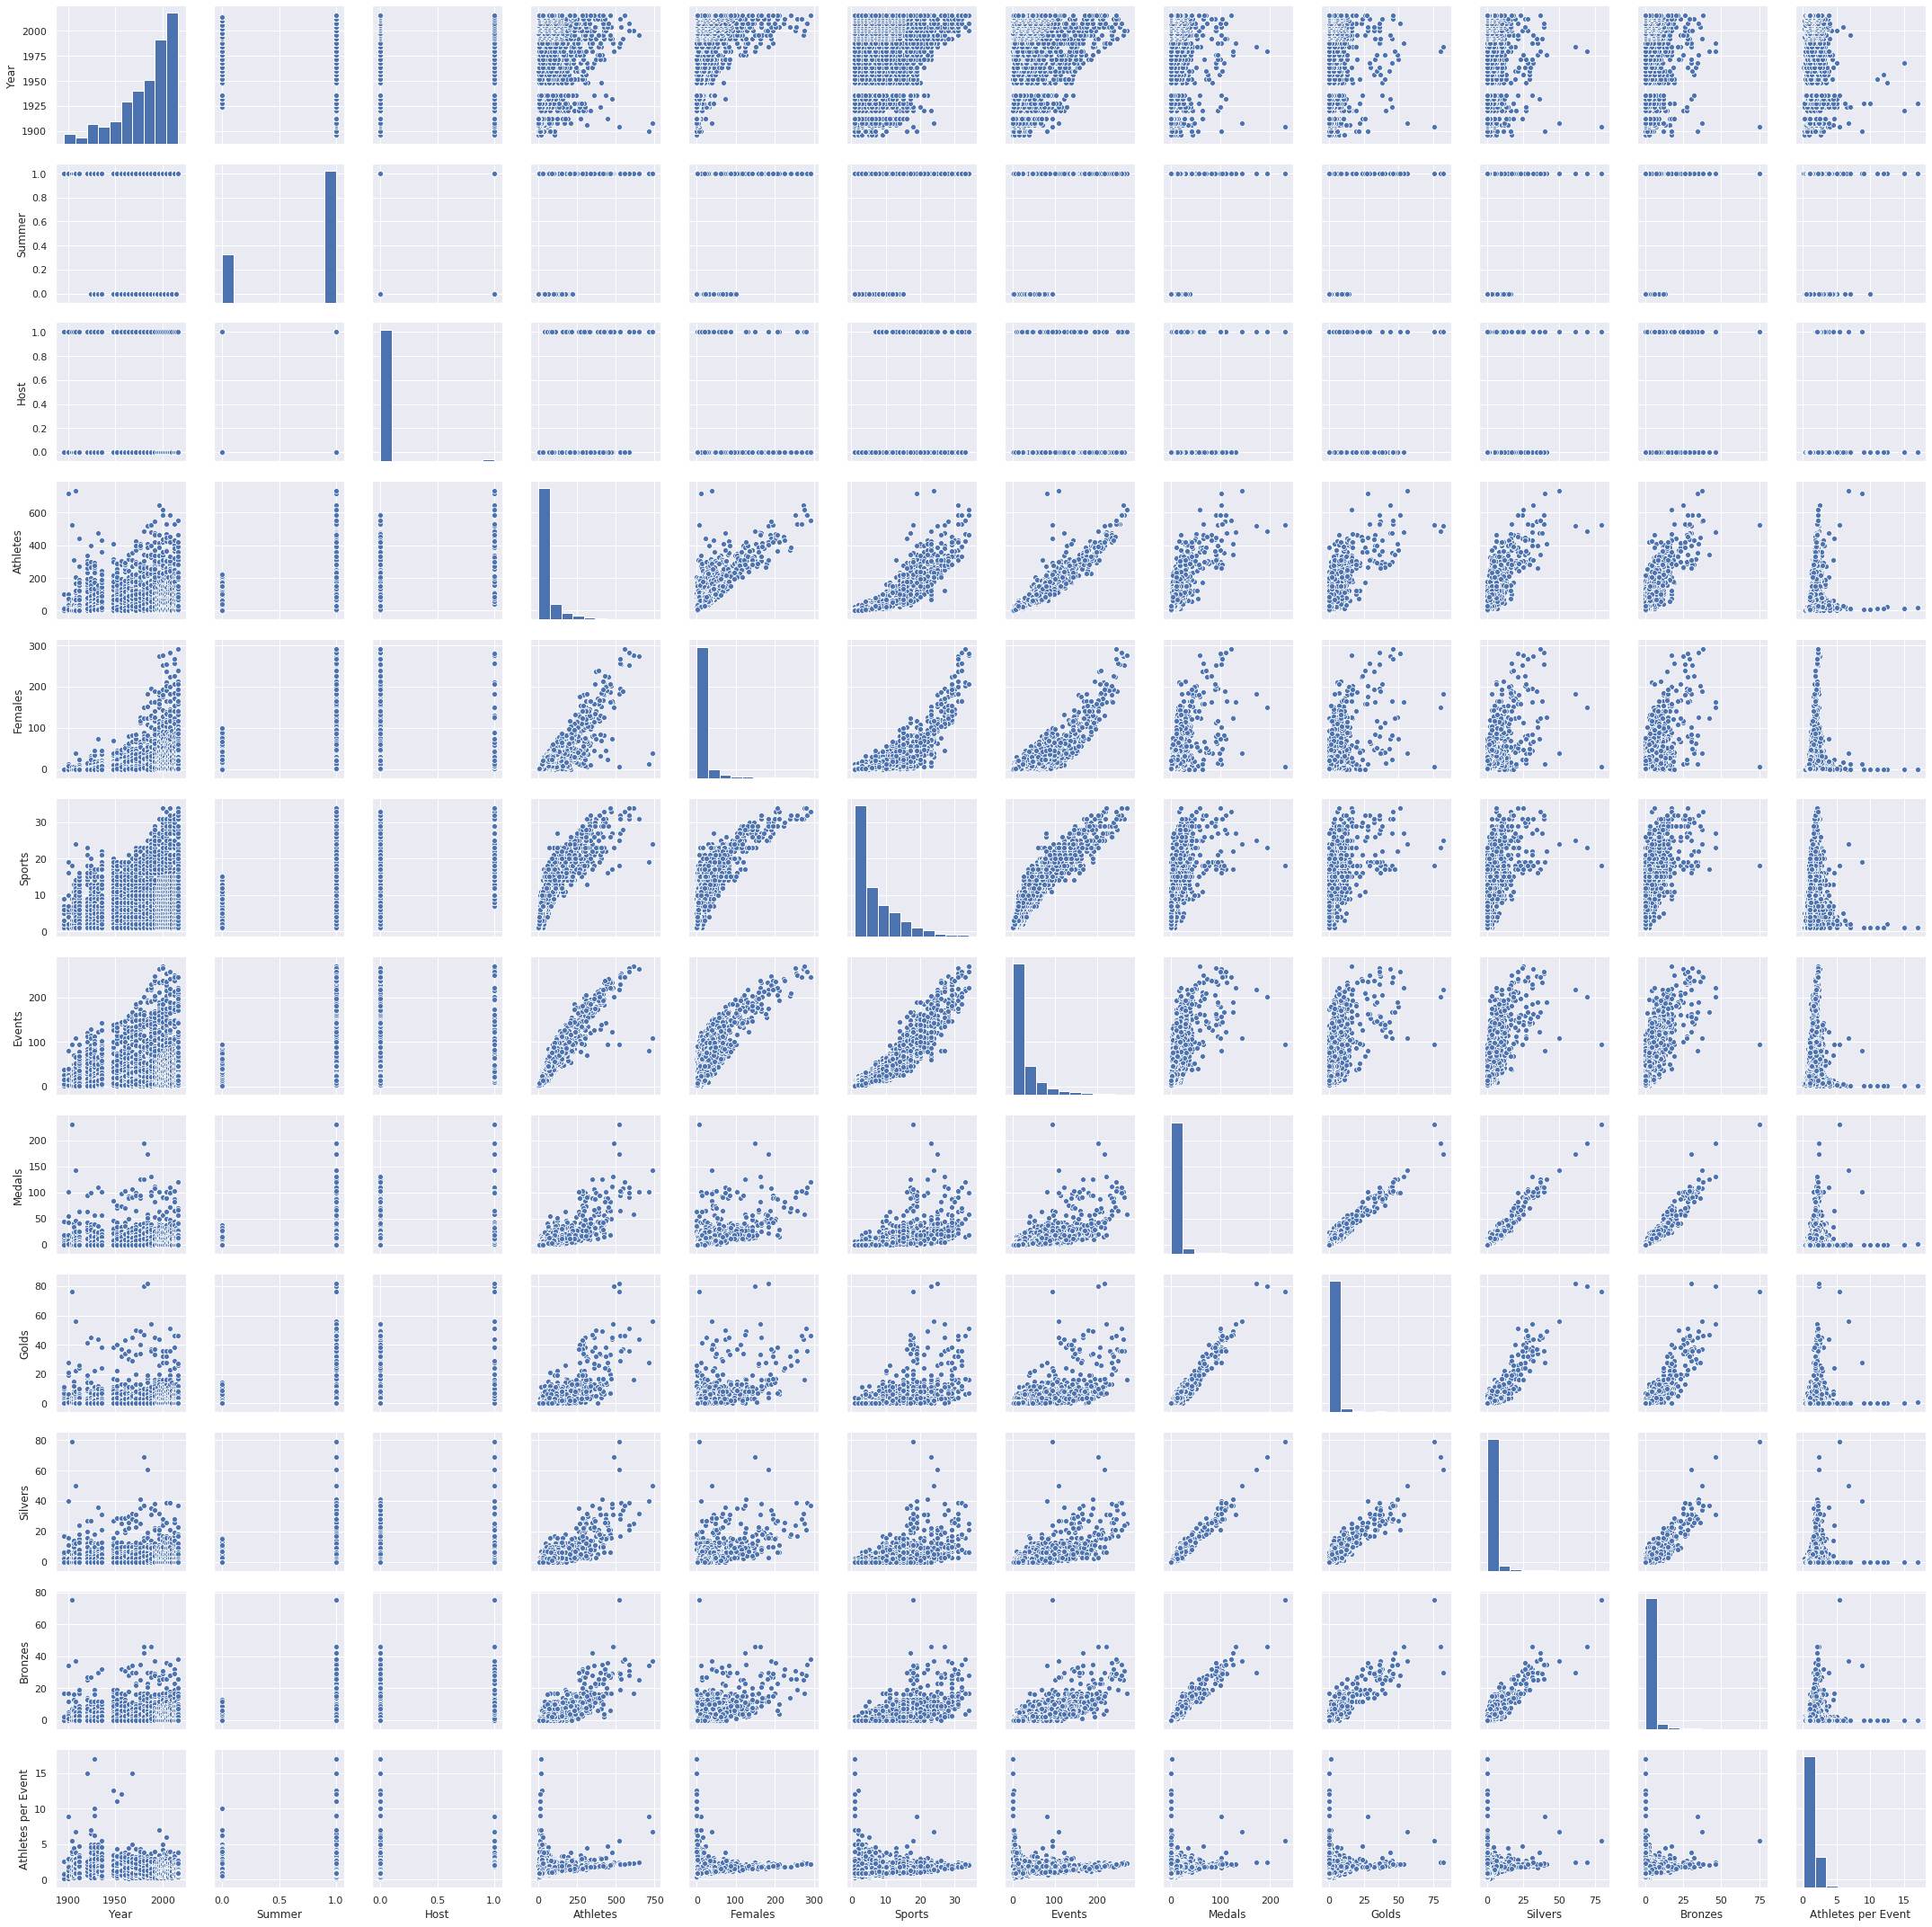

In [28]:
sns.pairplot(medals)
plt.show()

In [29]:
# variable correlation
correlation = pd.get_dummies(data=medals, columns=['NOC'])
correlation = correlation.corr()
correlation = correlation[['Medals','Golds','Silvers','Bronzes']]
correlation = correlation.sort_values(by='Medals', ascending=False)
correlation.head(30)

,Medals,Golds,Silvers,Bronzes
Medals,1.000000,0.971754,0.975820,0.961801
Silvers,0.975820,0.926025,1.000000,0.915978
Golds,0.971754,1.000000,0.926025,0.891145
Bronzes,0.961801,0.891145,0.915978,1.000000
Athletes,0.822909,0.755278,0.810137,0.837006
Events,0.728489,0.656249,0.710724,0.762323
Females,0.685554,0.634721,0.663649,0.702299
Sports,0.602658,0.532858,0.590651,0.639839
NOC_USA,0.422495,0.451349,0.409101,0.361057
Host,0.313454,0.316409,0.322365,0.270497


In [30]:
correlation = correlation.sort_values(by='Medals', ascending=True)
correlation.head(20)

,Medals,Golds,Silvers,Bronzes
Year,-0.091985,-0.086605,-0.097683,-0.083652
NOC_ISL,-0.034408,-0.030196,-0.033703,-0.036821
NOC_CHI,-0.032718,-0.029212,-0.030849,-0.035649
NOC_LIE,-0.031969,-0.027943,-0.032239,-0.033397
NOC_LIB,-0.031938,-0.028121,-0.031226,-0.034125
NOC_LUX,-0.031132,-0.026010,-0.030002,-0.035382
NOC_MON,-0.030996,-0.026802,-0.030928,-0.033064
NOC_BER,-0.028238,-0.024450,-0.028215,-0.030043
NOC_IND,-0.027486,-0.023347,-0.028720,-0.028489
NOC_SMR,-0.027300,-0.023446,-0.027056,-0.029500
